In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('Stiffness_data_overall_data.csv')

In [3]:
df

,Unnamed: 0,File_Index,X,Sample_ID,Stiffness_Score,Tumor_Type
0,1,1,TCGA-GV-A6ZA-01A-12R-A33J-07,TCGA-GV-A6ZA-01A-12R-A33J-07,5.374882,BLCA
1,2,1,TCGA-XF-A9SW-01A-11R-A42T-07,TCGA-XF-A9SW-01A-11R-A42T-07,55.067640,BLCA
2,3,1,TCGA-GU-A763-01A-11R-A32O-07,TCGA-GU-A763-01A-11R-A32O-07,3.775621,BLCA
3,4,1,TCGA-2F-A9KR-01A-11R-A38B-07,TCGA-2F-A9KR-01A-11R-A38B-07,8.417953,BLCA
4,5,1,TCGA-ZF-AA5N-01A-11R-A42T-07,TCGA-ZF-AA5N-01A-11R-A42T-07,17.774782,BLCA
...,...,...,...,...,...,...
5693,5694,14,TCGA-B5-A11M-01A-11R-A118-07,TCGA-B5-A11M-01A-11R-A118-07,51.440161,UCEC
5694,5695,14,TCGA-EO-A3KX-01A-11R-A22K-07,TCGA-EO-A3KX-01A-11R-A22K-07,7.195368,UCEC
5695,5696,14,TCGA-BG-A18A-01A-21R-A12I-07,TCGA-BG-A18A-01A-21R-A12I-07,17.726644,UCEC
5696,5697,14,TCGA-PG-A914-01A-11R-A37O-07,TCGA-PG-A914-01A-11R-A37O-07,9.421323,UCEC


In [4]:
average_value_A = df[df['Tumor_Type'] == 'BLCA']['Stiffness_Score'].mean()

#mean_list = [df[col].mean() for col in df['Tumor_Type']]

In [5]:
average_df = df.groupby('Tumor_Type')['Stiffness_Score'].mean().reset_index()
average_df

,Tumor_Type,Stiffness_Score
0,BLCA,21.990803
1,BRCA,39.225448
2,CHOL,15.829095
3,COAD,16.989581
4,DLBC,10.519020
5,ESCA,24.028446
6,KIRC,15.106367
7,LAML,1.785386
8,LIHC,13.808044
9,LUAD,23.526087


In [6]:
#This creates the dataframe for the exhausted T-cells for their exhaustion score
df_ex = pd.read_csv('exhaustion_scores_by_cancer_type_Tex_only_ALLTISSUES.csv')
df_ex

,Cell_ID,Cancer_Type,Cluster,Exhaustion_Score
0,AACTCCCGTTTGGCGC.33,adata_ov,CD8.c12.Tex.CXCL13,-0.296139
1,AAGTCTGCACAACTGT.33,adata_ov,CD8.c11.Tex.PDCD1,0.670908
2,ACGCCGACATATACGC.33,adata_ov,CD8.c12.Tex.CXCL13,0.510088
3,ACGGGCTAGTGTGAAT.33,adata_ov,CD8.c12.Tex.CXCL13,0.207171
4,AGAGCGAGTTCCAACA.33,adata_ov,CD8.c11.Tex.PDCD1,0.200026
...,...,...,...,...
13066,TTTACTGAGCTAGTGG.22,adata_bcl,CD8.c12.Tex.CXCL13,1.729574
13067,TTTACTGAGGACCACA.22,adata_bcl,CD8.c12.Tex.CXCL13,2.156981
13068,TTTGGTTGTTGATTGC.22,adata_bcl,CD8.c11.Tex.PDCD1,0.635182
13069,TTTGGTTTCTAACTCT.22,adata_bcl,CD8.c11.Tex.PDCD1,0.756597


In [7]:
df_ex_avg = df_ex.groupby('Cancer_Type')['Exhaustion_Score'].mean().reset_index()
df_ex_avg

,Cancer_Type,Exhaustion_Score
0,adata_bc,0.052567
1,adata_bcl,0.711779
2,adata_chol,1.176473
3,adata_esca,0.685733
4,adata_ftc,0.241561
5,adata_mm,0.653275
6,adata_ov,0.364564
7,adata_paca,0.415770
8,adata_rc,0.676073
9,adata_thca,0.631727


In [8]:
df_ex_avg["Cancer_Type"] = df_ex_avg["Cancer_Type"].replace({"adata_bc": "BRCA",
                                   "adata_bcl": "DLBC",
                                   "adata_chol": "CHOL",
                                   "adata_esca": "ESCA",
                                   "adata_ftc": "NA_ftc",
                                   "adata_mm": "LAML",
                                   "adata_ov": "OV",
                                   "adata_paca": "PACA",
                                   "adata_rc": "KIRC",
                                   "adata_thca": "THCA",
                                   "adata_ucec": "UCEC"})

In [9]:
df_ex_avg  = df_ex_avg.sort_values(by = 'Cancer_Type')
#df_ex_avg = df_ex_avg.drop('Tumor_Type', axis = 1)
df_ex_avg.columns = ['Tumor_Type', 'Exhaustion']
df_ex_avg

#Now we have our tumor types and their exhaustion scores in columns easily placed. 

,Tumor_Type,Exhaustion
0,BRCA,0.052567
2,CHOL,1.176473
1,DLBC,0.711779
3,ESCA,0.685733
8,KIRC,0.676073
5,LAML,0.653275
4,NA_ftc,0.241561
6,OV,0.364564
7,PACA,0.415770
9,THCA,0.631727


In [10]:
#We now merge together the exhaustion and ECM score data. 
df_merged = pd.merge(average_df, df_ex_avg, on='Tumor_Type', how='left')
df_merged

,Tumor_Type,Stiffness_Score,Exhaustion
0,BLCA,21.990803,NaN
1,BRCA,39.225448,0.052567
2,CHOL,15.829095,1.176473
3,COAD,16.989581,NaN
4,DLBC,10.519020,0.711779
5,ESCA,24.028446,0.685733
6,KIRC,15.106367,0.676073
7,LAML,1.785386,0.653275
8,LIHC,13.808044,NaN
9,LUAD,23.526087,NaN


In [11]:
C1_df = pd.read_csv('C1_exhaustion_scores_for_tumor_and_exhaustedonly.csv')
C1_df

,Cell_ID,Cancer_Type,Exhaustion_Score
0,AAACCTGTCACAATGC.34,adata_ov,1.041895
1,AAATGCCTCAAACAAG.34,adata_ov,0.289037
2,AACACGTGTAACGTTC.34,adata_ov,0.935517
3,AACACGTTCTTTAGGG.34,adata_ov,1.417494
4,AACCATGAGAGTCTGG.34,adata_ov,0.215335
...,...,...,...
10786,TTTACTGAGCTAGTGG.22,adata_bcl,1.491480
10787,TTTACTGAGGACCACA.22,adata_bcl,1.942037
10788,TTTGGTTGTTGATTGC.22,adata_bcl,0.287403
10789,TTTGGTTTCTAACTCT.22,adata_bcl,0.606680


In [12]:
#C1 is the exhaustion scores for tumor and exhausted only T-cells. 
#we need to rename the columns to match the other annotations. 
C1_df = pd.read_csv('C1_exhaustion_scores_for_tumor_and_exhaustedonly.csv')
df_ex_C1_avg = C1_df.groupby('Cancer_Type')['Exhaustion_Score'].mean().reset_index()
df_ex_C1_avg["Cancer_Type"] = df_ex_C1_avg["Cancer_Type"].replace({"adata_bc": "BRCA",
                                   "adata_bcl": "DLBC",
                                   "adata_chol": "CHOL",
                                   "adata_esca": "ESCA",
                                   "adata_ftc": "NA_ftc",
                                   "adata_mm": "LAML",
                                   "adata_ov": "OV",
                                   "adata_paca": "PACA",
                                   "adata_rc": "KIRC",
                                   "adata_thca": "THCA",
                                   "adata_ucec": "UCEC"})
df_ex_C1_avg.columns = ['Tumor_Type', 'Exhaustion']

In [13]:
#just checking the data to make sure that it makes sense and is ready to be merged
df_ex_C1_avg

,Tumor_Type,Exhaustion
0,BRCA,0.013457
1,DLBC,0.631452
2,CHOL,1.202970
3,ESCA,0.758742
4,NA_ftc,0.305912
5,LAML,0.641584
6,OV,0.571359
7,PACA,0.439849
8,KIRC,0.575843
9,THCA,0.519264


In [15]:
C1_merged = pd.merge(average_df, df_ex_C1_avg, on='Tumor_Type', how='left')

In [17]:
C1_merged = C1_merged.rename(columns={'Stiffness_Score':'ECM_Score'})
C1_merged

,Tumor_Type,ECM_Score,Exhaustion
0,BLCA,21.990803,NaN
1,BRCA,39.225448,0.013457
2,CHOL,15.829095,1.202970
3,COAD,16.989581,NaN
4,DLBC,10.519020,0.631452
5,ESCA,24.028446,0.758742
6,KIRC,15.106367,0.575843
7,LAML,1.785386,0.641584
8,LIHC,13.808044,NaN
9,LUAD,23.526087,NaN


Text(0.5, 1.0, 'Correlation between Exhaustion and ECM Scores \n in Exhausted T-cells from Pan-Cancer T-cell Atlas')

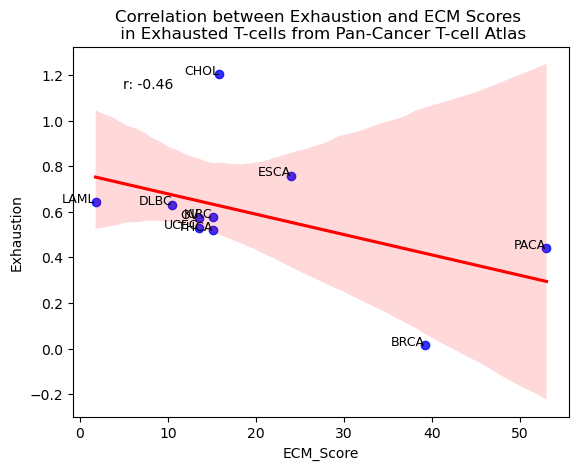

In [27]:
#now we can create the correlation plots where we get the values and label the data as well. 
r = C1_merged['Exhaustion'].corr(C1_merged['ECM_Score'])


sns.regplot(x='ECM_Score', y='Exhaustion', data=C1_merged, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
for i in range(len(C1_merged)):
    plt.text(C1_merged['ECM_Score'][i], C1_merged['Exhaustion'][i], str(C1_merged['Tumor_Type'][i]), fontsize=9, ha='right')
plt.text(0.1, 0.9, f'r: {r:.2f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.title("Correlation between Exhaustion and ECM Scores \n in Exhausted T-cells from Pan-Cancer T-cell Atlas")

In [61]:
#This data is the mechanotransduction scores for the entire gene set, and in exhausted T-cells
#from the pan-cancer T-cell atlas. This was not really used as we had an overlapping gene set
#C3, below, which made more sense since it was more specific to T-cells. 
C2_df = pd.read_csv('C2_GOmechanotransduction_scores_for_tumor_and_exhaustedonly.csv')
df_ex_C2_avg = C2_df.groupby('Cancer_Type')['Exhaustion_Score'].mean().reset_index()
df_ex_C2_avg["Cancer_Type"] = df_ex_C2_avg["Cancer_Type"].replace({"adata_bc": "BRCA",
                                   "adata_bcl": "DLBC",
                                   "adata_chol": "CHOL",
                                   "adata_esca": "ESCA",
                                   "adata_ftc": "NA_ftc",
                                   "adata_mm": "LAML",
                                   "adata_ov": "OV",
                                   "adata_paca": "PACA",
                                   "adata_rc": "KIRC",
                                   "adata_thca": "THCA",
                                   "adata_ucec": "UCEC"})
df_ex_C2_avg.columns = ['Tumor_Type', 'Exhaustion']
C2_merged = pd.merge(average_df, df_ex_C2_avg, on='Tumor_Type', how='left')


<Axes: xlabel='Stiffness_Score', ylabel='Exhaustion'>

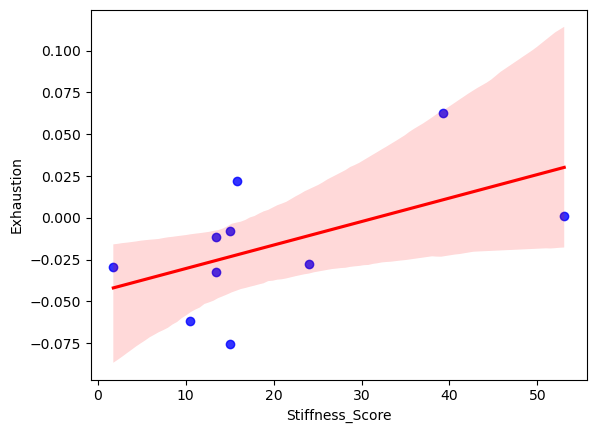

In [62]:
sns.regplot(x='Stiffness_Score', y='Exhaustion', data=C2_merged, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

In [63]:
correlation = C2_merged['Exhaustion'].corr(C2_merged['Stiffness_Score'])

print(correlation)

0.5328316213098215


In [31]:
#This data is the overlapping mechanotransductions scores along with exhausted T-cells
#

C3_df = pd.read_csv('C3_overlapping_mechanotransduction_scores_for_tumor_and_exhaustedonly.csv')
C3_df.columns = ['Cell_ID','Cancer_Type', 'Mechanotrasduction_Score']
df_ex_C3_avg = C3_df.groupby('Cancer_Type')['Mechanotrasduction_Score'].mean().reset_index()
df_ex_C3_avg["Cancer_Type"] = df_ex_C3_avg["Cancer_Type"].replace({"adata_bc": "BRCA",
                                   "adata_bcl": "DLBC",
                                   "adata_chol": "CHOL",
                                   "adata_esca": "ESCA",
                                   "adata_ftc": "NA_ftc",
                                   "adata_mm": "LAML",
                                   "adata_ov": "OV",
                                   "adata_paca": "PACA",
                                   "adata_rc": "KIRC",
                                   "adata_thca": "THCA",
                                   "adata_ucec": "UCEC"})
df_ex_C3_avg.columns = ['Tumor_Type', 'Mechanotrasduction_Score']
C3_merged = pd.merge(average_df, df_ex_C3_avg, on='Tumor_Type', how='left')
C3_merged.columns = ['Tumor_Type', 'ECM_Score', 'Mechanotransduction_Score']

Text(0.5, 1.0, 'Correlation between Mechanotransduction and Stiffness Scores \n in Exhausted T-cells from Pan-Cancer T-cell Atlas')

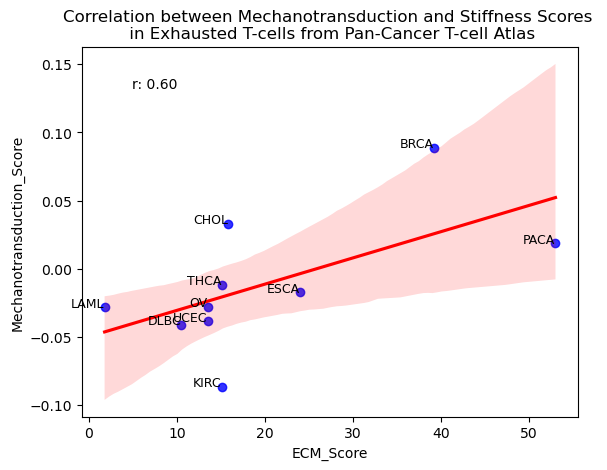

In [32]:
from scipy.stats import pearsonr

corr, _ = pearsonr(C3_merged['Mechanotransduction_Score'], C3_merged['ECM_Score'])
r = C3_merged['Mechanotransduction_Score'].corr(C3_merged['ECM_Score'])
r = 0.6
sns.regplot(x='ECM_Score', y='Mechanotransduction_Score', data=C3_merged, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

for i in range(len(C3_merged)):
    plt.text(C3_merged['ECM_Score'][i], C3_merged['Mechanotransduction_Score'][i], str(C3_merged['Tumor_Type'][i]), fontsize=9, ha='right')

plt.text(0.1, 0.9, f'r: {r:.2f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.title("Correlation between Mechanotransduction and Stiffness Scores \n in Exhausted T-cells from Pan-Cancer T-cell Atlas")


In [45]:
#This is the proportion of exhausted T-cells by tumor type. We used this to see if there was
#a relationship between ECM score and amount of T-cells that were exhausted. 

Prop_ex_df = pd.read_csv('Proportion_exhausted_tcells_by_tumor_type.csv')

Prop_ex_avg = Prop_ex_df.groupby('Cancer_Type')['Proportion_Exhausted'].mean().reset_index()
Prop_ex_avg["Cancer_Type"] = Prop_ex_avg["Cancer_Type"].replace({"adata_bc": "BRCA",
                                   "adata_bcl": "DLBC",
                                   "adata_chol": "CHOL",
                                   "adata_esca": "ESCA",
                                   "adata_ftc": "NA_ftc",
                                   "adata_mm": "LAML",
                                   "adata_ov": "OV",
                                   "adata_paca": "PACA",
                                   "adata_rc": "KIRC",
                                   "adata_thca": "THCA",
                                   "adata_ucec": "UCEC"})
Prop_ex_avg.columns = ['Tumor_Type', 'Proportion Exhausted']
Prop_merged = pd.merge(average_df, Prop_ex_avg, on='Tumor_Type', how='left')

In [46]:
Prop_ex_avg

,Tumor_Type,Proportion Exhausted
0,BRCA,0.052227
1,DLBC,0.287386
2,CHOL,0.324324
3,ESCA,0.343716
4,NA_ftc,0.054759
5,LAML,0.099387
6,OV,0.094444
7,PACA,0.150678
8,KIRC,0.269231
9,THCA,0.102978


Text(0.5, 1.0, 'Correlation between Mechanotransduction and Stiffness Scores \n in Exhausted T-cells from Pan-Cancer T-cell Atlas')

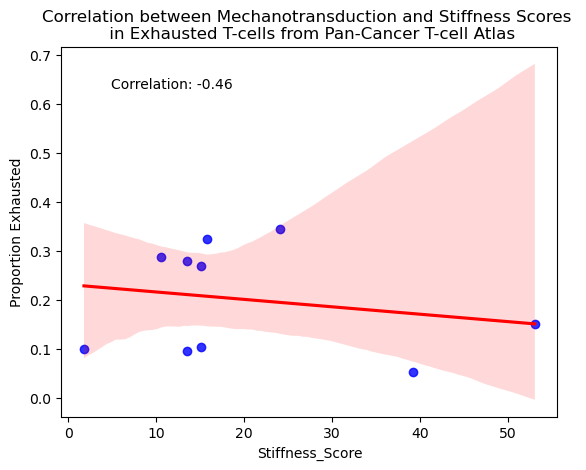

In [48]:

sns.regplot(x='Stiffness_Score', y='Proportion Exhausted', data=Prop_merged, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})



plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.title("Correlation between Mechanotransduction and Stiffness Scores \n in Exhausted T-cells from Pan-Cancer T-cell Atlas")


In [41]:
#C4 is the overlapping mechanotransduction scores in all t-cells. 
C4_df = pd.read_csv('C4_overlapping_mechanotransduction_scores_for_tumor_and_all_tcells.csv')

df_ex_C4_avg = C4_df.groupby('Cancer_Type')['Exhaustion_Score'].mean().reset_index()
df_ex_C4_avg["Cancer_Type"] = df_ex_C4_avg["Cancer_Type"].replace({"adata_bc": "BRCA",
                                   "adata_bcl": "DLBC",
                                   "adata_chol": "CHOL",
                                   "adata_esca": "ESCA",
                                   "adata_ftc": "NA_ftc",
                                   "adata_mm": "LAML",
                                   "adata_ov": "OV",
                                   "adata_paca": "PACA",
                                   "adata_rc": "KIRC",
                                   "adata_thca": "THCA",
                                   "adata_ucec": "UCEC"})
df_ex_C4_avg.columns = ['Tumor_Type', 'Exhaustion']
C4_merged = pd.merge(average_df, df_ex_C4_avg, on='Tumor_Type', how='left')
C4_merged.columns = ['Tumor_Type', 'ECM_Score', 'Mechanotransduction_Score']

In [143]:
C4_merged.columns = ['Tumor_Type', 'ECM_Score', 'Mechanotransduction_Score']


Text(0.5, 1.0, 'Correlation between Mechanotransduction and ECM Scores \n in All T-cells from Pan-Cancer T-cell Atlas')

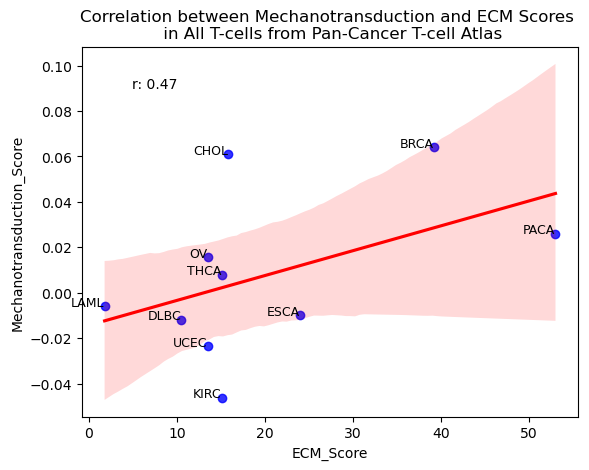

In [43]:


r = C4_merged['Mechanotransduction_Score'].corr(C4_merged['ECM_Score'])
sns.regplot(x='ECM_Score', y='Mechanotransduction_Score', data=C4_merged, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

#r, p = stats.pearsonr(C4_merged['ECM_Score'], C4_merged['Mechanotransduction_Score'])


#plt.annotate(f"r = {r:.2f}, p = {p:.3f}", xy=(0.1, 0.9), xycoords='axes fraction')
for i in range(len(C4_merged)):
    plt.text(C4_merged['ECM_Score'][i], C4_merged['Mechanotransduction_Score'][i], str(C4_merged['Tumor_Type'][i]), fontsize=9, ha='right')

plt.text(0.1, 0.9, f'r: {r:.2f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.title("Correlation between Mechanotransduction and ECM Scores \n in All T-cells from Pan-Cancer T-cell Atlas")
